## view与reshape的区别：
相同之处
都可以用来重新调整 tensor 的形状。

不同之处
view 函数只能用于 contiguous 后的 tensor 上，也就是只能用于内存中连续存储的 tensor。如果对 tensor 调用过 transpose, permute 等操作的话会使该 tensor 在内存中变得不再连续，此时就不能再调用 view 函数。因此，需要先使用 contiguous 来返回一个 contiguous copy。


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [5]:
class Reshape(torch.nn.Module):
    def forward(self, X):
        return X.view(-1, 1, 28, 28)

In [6]:
reshape_function = Reshape()

In [8]:
X = torch.rand(size=(2, 28, 28))

In [10]:
reshape_function(X).shape

torch.Size([2, 1, 28, 28])

In [27]:
def weight_init(model):
    if isinstance(model, nn.Conv2d or nn.Linear):
        nn.init.xavier_normal_(model.weight)
        model.bias.data.zero_()
        
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.model = nn.Sequential(
            Reshape(),
            nn.Conv2d(1, 6, kernel_size=5, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.Sigmoid(),
            nn.AvgPool2d(2, stride=2),
            nn.Flatten(),
            nn.Linear(16 * 5 * 5, 120),
            nn.Linear(120, 84),
            nn.Linear(84, 10)
        )
        self.model.apply(weight_init)

In [28]:
net = LeNet()

In [29]:
net

LeNet(
  (model): Sequential(
    (0): Reshape()
    (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (2): Sigmoid()
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (5): Sigmoid()
    (6): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=400, out_features=120, bias=True)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [30]:
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net.model:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Reshape output shape: 	 torch.Size([1, 1, 28, 28])
Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


In [31]:
X

tensor([[ 0.0537, -0.0149, -0.2110,  0.0106,  0.0522, -0.0127, -0.1042,  0.0784,
          0.0982, -0.0955]], grad_fn=<AddmmBackward>)

In [32]:
d2l.load_data_fashion_mnist?

In [33]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

/Users/wenyalan/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [46]:
def evaluate_accuracy_gpu(net, data_iter, device=None):
    if isinstance(net, torch.nn.Module):
        net.eval()
        if not device:
            device = next(iter(net.parameters())).device
    metric = d2l.Accumulator(2)
    for X,y in data_iter:
        if isinstance(X, list):
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = y.to(device)
        metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]
        

In [44]:
def weight_init(model):
    if isinstance(model, nn.Conv2d) or isinstance(model, nn.Linear):
        nn.init.xavier_normal_(model.weight)

net = nn.Sequential(
            Reshape(),
            nn.Conv2d(1, 6, kernel_size=5, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.Sigmoid(),
            nn.AvgPool2d(2, stride=2),
            nn.Flatten(),
            nn.Linear(16 * 5 * 5, 120),
            nn.Linear(120, 84),
            nn.Linear(84, 10)
        )
net.apply(weight_init)

Sequential(
  (0): Reshape()
  (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (2): Sigmoid()
  (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): Sigmoid()
  (6): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (7): Flatten(start_dim=1, end_dim=-1)
  (8): Linear(in_features=400, out_features=120, bias=True)
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Linear(in_features=84, out_features=10, bias=True)
)

In [38]:
def train_chp6(net, train_iter, test_iter, num_epochs, lr, device):
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                        legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X,y) in enumerate(train_iter):
            timer.start()
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l*X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches, (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch+1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

loss 0.534, train acc 0.801, test acc 0.774
6051.8 examples/sec on cpu


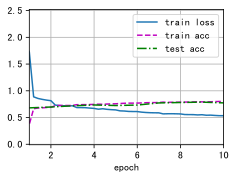

In [45]:
lr, num_epochs = 0.1, 10
train_chp6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [50]:
# 初始化偏差是否设置为0会造成巨大的不同
net = nn.Sequential(
            Reshape(),
            nn.Conv2d(1, 6, kernel_size=5, padding=2),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(6, 32, kernel_size=5),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Flatten(),
            nn.Linear(32 * 5 * 5, 120),
            nn.Linear(120, 84),
            nn.Linear(84, 10)
        )
net.apply(weight_init)

Sequential(
  (0): Reshape()
  (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (2): LeakyReLU(negative_slope=0.01)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(6, 32, kernel_size=(5, 5), stride=(1, 1))
  (5): LeakyReLU(negative_slope=0.01)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Flatten(start_dim=1, end_dim=-1)
  (8): Linear(in_features=800, out_features=120, bias=True)
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Linear(in_features=84, out_features=10, bias=True)
)

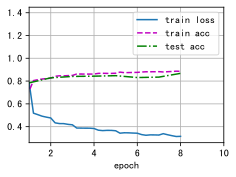

In [ ]:
lr, num_epochs = 0.1, 10
train_chp6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())